In [1]:
import networkx
import math
import scipy.optimize
import numpy
import sys
from lib.vis import *
from lib.graph_signal_proc import *
from lib.optimal_cut import *
from lib.time_graph import *
from lib.io import *

from scipy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
from numpy.linalg import eigh

In [2]:
G = TimeGraph(5)

G.add_edge(0,1,0)
G.add_edge(1,2,0)
G.add_edge(1,4,0)
G.add_edge(3,4,0)
G.add_edge(4,5,0)

G.add_edge(0,1,1)
G.add_edge(1,2,1)
G.add_edge(1,4,1)
G.add_edge(3,4,1)
G.add_edge(4,5,1)

G.add_edge(0,1,2)
G.add_edge(1,2,2)
G.add_edge(1,4,2)
G.add_edge(3,4,2)
G.add_edge(4,5,2)

G.add_edge(0,1,3)
G.add_edge(1,2,3)
G.add_edge(1,4,3)
G.add_edge(3,4,3)
G.add_edge(4,5,3)

G.add_edge(0,1,4)
G.add_edge(1,2,4)
G.add_edge(1,4,4)
G.add_edge(3,4,4)
G.add_edge(4,5,4)

G.add_edge(0,1,5)
G.add_edge(1,2,5)
G.add_edge(1,4,5)
G.add_edge(3,4,5)
G.add_edge(4,5,5)

In [19]:
G = TimeGraph(0)

G.add_edge(0,1,0)
G.add_edge(1,2,0)

G.add_edge(0,1,1)
G.add_edge(0,2,1)

G.add_edge(0,1,2)
G.add_edge(0,2,2)

In [2]:
G = TimeGraph()

G.add_edge(0,1,0)
G.add_edge(1,2,0)
G.add_edge(1,4,0)
G.add_edge(3,4,0)
G.add_edge(4,5,0)

G.add_edge(0,1,1)
G.add_edge(1,2,1)
G.add_edge(1,4,1)
G.add_edge(3,4,1)
G.add_edge(4,5,1)

G.add_edge(0,1,2)
G.add_edge(1,2,2)
G.add_edge(1,4,2)
G.add_edge(3,4,2)
G.add_edge(4,5,2)

G.add_edge(0,1,3)
G.add_edge(1,2,3)
G.add_edge(1,4,3)
G.add_edge(3,4,3)
G.add_edge(4,5,3)

In [72]:
G = TimeGraph()

G.add_edge(0,1,0)
G.add_edge(0,1,1)
G.add_edge(0,1,2)
G.add_edge(0,1,3)
G.add_edge(0,1,4)
G.add_edge(0,1,5)
G.add_edge(0,1,6)
G.add_edge(0,1,7)
G.add_edge(0,1,8)
G.add_edge(0,1,9)
G.add_edge(0,1,10)
G.add_edge(0,1,11)

In [10]:
G = read_time_graph('/home/arlei/Phd/research/network_process/data/facebook/facebook_dyn.graph', 10)

In [65]:
G.size()

2

In [8]:
G.graphs[0].edge[1][0]

{'weight': 1.0}

In [20]:
numpy.dot(C.todense(), C.todense())

matrix([[ 30.,  -6.,  -6., ...,   0.,   0.,   0.],
        [ -6.,  30.,  -6., ...,   0.,   0.,   0.],
        [ -6.,  -6.,  30., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   0., ...,  30.,  -6.,  -6.],
        [  0.,   0.,   0., ...,  -6.,  30.,  -6.],
        [  0.,   0.,   0., ...,  -6.,  -6.,  30.]])

In [7]:
L = create_laplacian_matrix(G)
C = create_c_matrix(G)

M = scipy.sparse.csr_matrix.dot(scipy.sparse.csr_matrix.dot(C, L), C)
(eigvals, eigvecs) = scipy.sparse.linalg.eigs(M, k=G.num_snaps()+1, which='SM') 
scipy.sparse.csr_matrix.dot(eigvecs[:,0], C).real

array([-1.13829045, -0.63921021, -1.13829045,  1.13829045,  0.63921021,
        1.13829045, -1.13829045, -0.63921021, -1.13829045,  1.13829045,
        0.63921021,  1.13829045, -1.13829045, -0.63921021, -1.13829045,
        1.13829045,  0.63921021,  1.13829045, -1.13829045, -0.63921021,
       -1.13829045,  1.13829045,  0.63921021,  1.13829045, -1.13829045,
       -0.63921021, -1.13829045,  1.13829045,  0.63921021,  1.13829045,
       -1.13829045, -0.63921021, -1.13829045,  1.13829045,  0.63921021,
        1.13829045])

In [5]:
x

array([ -2.67538813e-09,   3.82460436e-09,  -7.36158106e-09,
         2.04811049e-08,   1.04779966e-08,  -2.47467370e-08,
         3.07454940e-02,  -4.16940845e-01,  -4.47686361e-01,
        -3.07454652e-02,   4.16940862e-01,   4.47686315e-01,
         1.75407790e-03,   1.91067391e-01,   1.89313306e-01,
        -1.75407750e-03,  -1.91067388e-01,  -1.89313309e-01,
         3.50989914e-02,  -3.57654096e-01,  -3.92753119e-01,
        -3.50989964e-02,   3.57654114e-01,   3.92753106e-01,
        -6.75985349e-02,   5.83527586e-01,   6.51126129e-01,
         6.75985134e-02,  -5.83527594e-01,  -6.51126100e-01,
        -1.88089428e-08,  -3.69426438e-09,   3.57503714e-09,
         1.73920902e-08,  -1.46827400e-09,   3.00435454e-09])

In [44]:
eigvecs[:,numpy.argsort(eigvals.real)[G.num_snaps()]]

array([-0.23235257, -0.13047824, -0.23235257,  0.23235257,  0.13047824,
        0.23235257, -0.23235257, -0.13047824, -0.23235257,  0.23235257,
        0.13047824,  0.23235257, -0.23235257, -0.13047824, -0.23235257,
        0.23235257,  0.13047824,  0.23235257, -0.23235257, -0.13047824,
       -0.23235257,  0.23235257,  0.13047824,  0.23235257])

In [7]:
power_method(M, 1000)

array([-0.0275733 ,  0.09820375, -0.0275733 ,  0.0275733 , -0.09820375,
        0.0275733 ,  0.07533165, -0.26829763,  0.07533165, -0.07533165,
        0.26829763, -0.07533165, -0.10290494,  0.36650138, -0.10290494,
        0.10290494, -0.36650138,  0.10290494,  0.10290494, -0.36650138,
        0.10290494, -0.10290494,  0.36650138, -0.10290494, -0.07533165,
        0.26829763, -0.07533165,  0.07533165, -0.26829763,  0.07533165,
        0.0275733 , -0.09820375,  0.0275733 , -0.0275733 ,  0.09820375,
       -0.0275733 ])

In [8]:
scipy.sparse.csr_matrix.dot(e, C)

matrix([[ -1.87350135e-16,  -6.08887940e-16,   7.28583860e-17,
          -1.05124243e-15,   2.97158131e-15,  -1.19695920e-15,
          -1.11022302e-16,  -7.19910243e-16,  -3.81639165e-17,
          -1.05818132e-15,   3.04790915e-15,  -1.12063137e-15,
          -1.11022302e-16,  -7.19910243e-16,  -3.81639165e-17,
          -1.05818132e-15,   3.04790915e-15,  -1.12063137e-15,
          -1.11022302e-16,  -7.19910243e-16,  -3.81639165e-17,
          -1.05818132e-15,   3.04790915e-15,  -1.12063137e-15,
          -1.82145965e-16,  -6.45317133e-16,   2.60208521e-17,
          -1.17093835e-15,   3.05484804e-15,  -1.08246745e-15,
           1.31838984e-16,  -9.03790931e-16,  -3.98986399e-17,
          -8.56953397e-16,   3.04097025e-15,  -1.37216627e-15]])

In [6]:
L = create_laplacian_matrix(G).todense()
C = create_c_matrix(G).todense()

sqrtC = sqrtm(C)
isqrtC = sqrtm(scipy.linalg.pinv(C))
M = numpy.dot(numpy.dot(isqrtC, L), isqrtC)

#(eigvals, eigvecs) = scipy.linalg.eigh(M, eigvals=(G.num_snaps()+1, G.num_snaps()+1))

#M = scipy.dot(scipy.dot(C, L), C)
(eigvals, eigvecs) = scipy.linalg.eigh(M)
numpy.asarray(scipy.dot(eigvecs[:,numpy.argsort(eigvals.real)[G.num_snaps()]], sqrtC))

array([[-0.46470513, -0.26095647, -0.46470513,  0.46470513,  0.26095647,
         0.46470513, -0.46470513, -0.26095647, -0.46470513,  0.46470513,
         0.26095647,  0.46470513, -0.46470513, -0.26095647, -0.46470513,
         0.46470513,  0.26095647,  0.46470513, -0.46470513, -0.26095647,
        -0.46470513,  0.46470513,  0.26095647,  0.46470513, -0.46470513,
        -0.26095647, -0.46470513,  0.46470513,  0.26095647,  0.46470513,
        -0.46470513, -0.26095647, -0.46470513,  0.46470513,  0.26095647,
         0.46470513]])

In [73]:
#x = eigen_vec_cut_prod(G)
x = eigen_vec_cut_inv(G)
#x = fast_eigen_vec_cut(G, 10)
c = sweep(G, x)

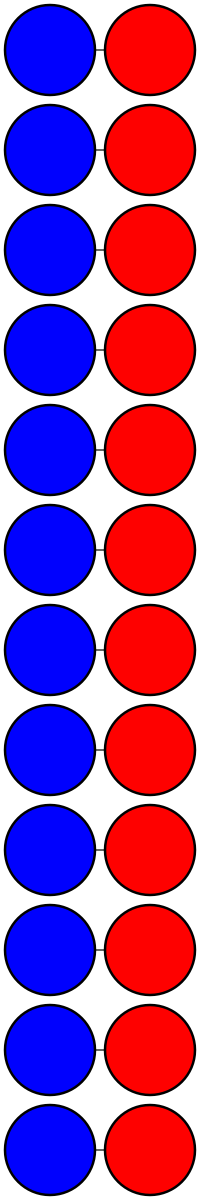

In [74]:
draw_time_graph_eig(G, x, "synthetic.svg")

#draw_time_graph(G, "synthetic.svg")

from IPython.display import SVG

SVG(filename='synthetic.svg')

In [7]:
x

array([ 1.62221421, -0.32444284, -0.32444284, -0.32444284, -0.32444284,
       -0.32444284,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [3]:
fast_eigen_vec_cut(G, 10)

array([ 1.48028421,  0.6103221 ,  0.70523667, -1.01995046, -0.61550165,
       -1.16039086,  1.52371962,  0.61037858,  0.66174478, -0.96326328,
       -0.61544517, -1.21713453,  1.56698558,  0.61043506,  0.61842233,
       -0.88481283, -0.61538869, -1.29564146,  1.56698558,  0.61043506,
        0.61842233, -0.82135983, -0.61538869, -1.35909446,  1.52371962,
        0.61037858,  0.66174478, -0.7861471 , -0.61544517, -1.3942507 ,
        1.48028421,  0.6103221 ,  0.70523667, -0.7728671 , -0.61550165,
       -1.40747423])

In [9]:
set_f(G.g, numpy.ones(len(G.g.nodes())))

In [14]:
G.g.node[0]["value"]

1.0

In [18]:
g.node[3]["value"]

1.0

In [17]:
g.nodes()

[3, 4, 5]

In [13]:
x = numpy.array([1., 1., -1.])

In [18]:
numpy.dot(numpy.dot(x, D), x)

9.0

In [17]:
D = 3*numpy.identity(3)

In [21]:
C = create_c_matrix(G).todense()

In [94]:
G = networkx.fast_gnp_random_graph(10, .4)

In [95]:
L = networkx.laplacian_matrix(G).todense()

In [96]:
(eigvals, eigvecs) = scipy.linalg.eig(L)

In [97]:
eigvals

array([ 0.00000000+0.j,  1.07027852+0.j,  7.04228044+0.j,  6.58769963+0.j,
        6.22438509+0.j,  2.33194233+0.j,  5.10784377+0.j,  4.42546150+0.j,
        3.69010591+0.j,  3.52000281+0.j])

In [81]:
L

matrix([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  0,  0, -1],
        [ 0,  0,  0,  0,  0,  1,  0,  0, -1,  0],
        [ 0,  0, -1,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  0,  0,  1,  0],
        [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  1]], dtype=int64)

In [50]:
eigvecs[:,17]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.70710678,  0.70710678,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [51]:
x = eigen_vec_cut_prod(G)

In [66]:
x

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.])

matrix([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.

In [71]:
G.swap_cost()

0